# Homework 5: In Vino Veritas

<img src="http://www.winemaniacs.com/wp-content/uploads/2013/04/WineRotator-2000x925.jpg">

酿酒师可以根据葡萄酒的化学性质预测葡萄酒的收购方法？是否有化学指标与葡萄酒的“品质”相关联？

在这个问题上，我们将会检测<a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">UCI website</a>上葡萄酒质量的数据集。这个数据集记录了来自北葡萄牙的上千只白葡萄酒和红葡萄酒的11个化学属性（例如如糖，柠檬酸，酒精，pH等的浓度。），这些被记录的属性的取值从1到10。在这个问题上，我们将只查看红葡萄酒的数据。

In [11]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn.cross_validation

## 问题1：数据收集
Import only the data for **red** wine from the <a href='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'>dataset repository</a>. **Build a pandas dataframe** from the csv file and **print the head**. You might have to change the default delimiter used by the <a href='http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html'>read_csv</a> function in Pandas.

In [12]:
# your code here
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


As in any machine learning problem, we have the feature data, usually labeled as $X$, and the target data, labeled $Y$. Every row in the matrix $X$ is a datapoint (i.e. a wine) and every column in $X$ is a feature of the data (e.g. pH). For a classification problem, $Y$ is a column vector containing the class of every datapoint.

We will use the *quality* column as our target variable. **Save the *quality* column as a separate numpy array** (labeled $Y$) and **remove the *quality* column** from the dataframe.

Also, we will simplify the problem to a binary world in which wines are either "bad" ($\text{score} < 7$) or "good" ($\text{score} \geq 7)$. **Change the $Y$ array** accordingly such that it only contains zeros ("bad" wines) and ones ("good" wines). For example, if originally $Y = [1,3,8,4,7]$, the new $Y$ should be $[0,0,1,0,1]$.

In [13]:
# your code here
Y = df['quality'].values
df.drop('quality', axis=1, inplace=1)
Y = np.array([1 if y>=7 else 0 for y in Y])

Use the <a href='http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.as_matrix.html'>as_matrix</a> function in Pandas to **save the feature information in your data frame as a numpy array**. This is the $X$ matrix.

In [15]:
# your code here
X = df.as_matrix()
X.shape

(1599, 11)

## 问题2：不平衡数据的估计
In this section, we explore a number of different methods to predict the quality of a wine $Y$ based on the recorded features $X$. Formulated as a machine learning problem, we wish to predict the **target** $Y$ as a function of the **features** $X$.

Because we have defined $Y$ as a binary variable (encoding *bad* as 0 and *good* as 1), this is a **classification** problem. In class, we have discussed several approaches to classifiction incuding **decision trees**, **random forests**, and **Support Vector Machines (SVM)**. 

For this problem, we will focus on **random forests**, but we will later in the Problem set invoke these other techniques. Recall from class that the random forest technique works by aggregating the results from a number of randomly perturbed decision trees constructed to explain the data.

**(a)** 在课堂上，我们看到，对于固定的数据集，决策树算法将生成一个单一的固定树来执行分类任务。描述一个随机森林是如何由独立的决策树建成的。用于构建多种决策树的过程中的随机性来源是什么？

回答：随机森林以两种方式增加随机性。首先，它随机地重新采样数据，因此每个决策树都适用于略有不同的数据集。其次，对于每个决策树中的每个分割，随机森林算法只考虑一个随机子集的变量进行分割。所有的决策树都是彼此独立进行训练。为了做出预测，所有树都是独立预测的，投票占多数的获胜。

**(b)** 构建随机森林有许多方法 - 构造树的方法中的这些差异被编码为*调整参数*。通常情况下，我们的目标是构建良好的预测，我们可以设置这些调整参数，以获得预测任务中最佳的预测性能。建立随机森林最重要的调整参数之一是构建树的数量。

在这里，您应该将随机森林分类器应用于葡萄酒数据，并使用交叉验证来了解如何在更改森林中的树数时分类器的分数发生变化。使用scikit学习库中内置的随机森林分类器和cross_val_score函数（使用默认评分方法）绘制随着随机林中树数的变化预测分数变化函数，范围从1（简单决策树）到40.您应该使用10倍交叉验证。随意使用seaborn图库的boxplot功能。

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

## your code here
scores = []

for ne in range(1, 41):
    clf = RandomForestClassifier(n_estimators=ne)
    score_list = cross_val_score(clf, X, Y, cv=10)
    scores.append(score_list)

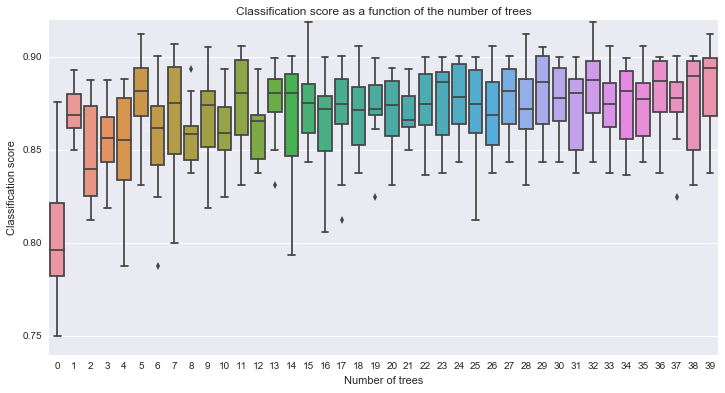

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=scores)
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees')
plt.show()

**(c)** 描述交叉验证准确性与决策树数量之间的关系。在选择要使用的树数量时，应该考虑什么权衡？

回答：准确率似乎随着更多的树而改善，其平均度非常快（直到15棵树，来自我所看到的）。在这一点上，我们必须考虑与小的准确率增加的收益相比拟合额外树的计算成本。

**(d)**相比使用硬币判断葡萄酒好坏，这些准确度分数看起来非常不错。然而，在二进制分类问题中，如果一个类（比如，不好的酒）比另一个类（比如说好的葡萄酒）更常见，就是当这些类是不平衡的时候，那么准确性会误导人，认为模型不错。 

These accuracy scores look very promising compared to, say, classifying the wine using a coinflip. However, in binary classification problems, accuracy can be misleading if one class (say, bad wine) is much more common than another (say, good wine), this is, when the classes are **unbalanced**.

**打印**在数据集中标记为“不良”的葡萄酒的百分比，**绘制与上一个问题相同的boxplot**，但这次在图上画一条线表示总是猜测零（“不好酒”）的**准确度**。

86.4290181363


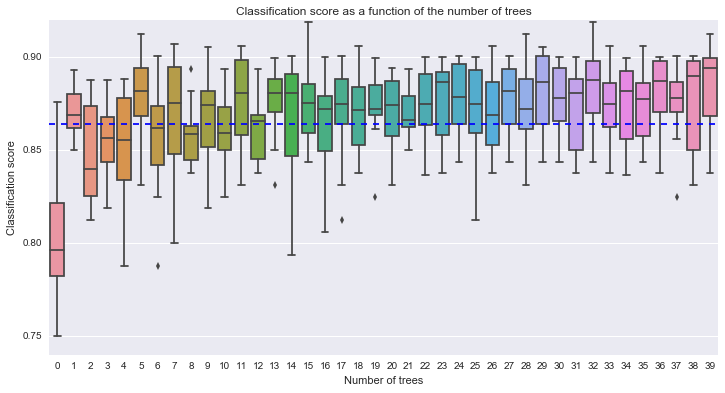

In [26]:
# your code here
blind_guess_score = sum(1-Y) / float(len(Y))
print(100*blind_guess_score)

plt.figure(figsize=(12,6))
sns.boxplot(data=scores)
plt.axhline(y=blind_guess_score, ls='--')
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees')
plt.show()

### 评估指标
当数据集中有不平衡的类时，猜测较常见的类往往会产生非常高的精度。因此，我们通常希望在评估分类器的预测性能时使用对不平衡性较不敏感的不同度量。这些指标最初是为临床试验开发的，所以为了保持标准术语，我们将“好的”葡萄酒（价值1）定义为“正”，“不良”葡萄酒（价值0）作为“负”。然后我们定义以下内容：

$P$ - 样品中的阳性数。 

$N$ - 样本中的阴性数。 

$TP$ - 真阳性的数量：分类器的“正”猜测有多少是真实的。 

$FP$ - 假阳数量：分类器的“正”猜测实际上有多少是负数。 

$TN$ - 真阴性数;类似地，这是分类器的“负”猜测中有多少是真实的。 

$FN$ - 假阴性数;有多少“负”猜测实际上是正的。 

当在scikit中调用计算分数的函数时，学习您获得了有效的默认度量，这被称为**准确度accuracy**。这只是所有样本中成功猜测（正和负样本）的比例：
$$\text{accuracy} = \frac{TP + TN}{P+N}.$$
在我们的案例中，当两个类（好和坏的葡萄酒）在样品中非常不平衡时，我们应该寻求更好的效率测量。 

通常，目标是成功地识别正类（罕见类）的成员 - 这可能是优质葡萄酒或呈现罕见疾病的患者。通常的做法是定义以下比例：

**召回率recall**（也称为敏感度或真实阳性率）是所有阳性中真实阳性猜测的比率：
$$\text{recall} = \frac{TP}{P}=\frac{TP}{TP+FN}.$$
**精确度precision** 是真实的阳性猜测与所有阳性猜测的比率：
$$\text{precision} = \frac{TP}{TP+FP}.$$


**（e）**:用文字说明**精度**与**召回**之间的区别。描述一个应用场景，其中精度比召回要重要一些，一种情况是召回会比精度更重要。

回答：

因为精度和召回都提供有关分类器质量的有价值的信息，我们经常希望将它们组合成一个单一的通用分数。 **F1**得分定义为召回和精度的**调和平均值harmonic mean**：
$$F_1 = \frac{2\times\text{recall}\times\text{precision}}{\text{recall} + \text{precision}}.$$
两个数字的调和均值比标准算术平均值更接近两个数字中较小的数字。因此，F1分数倾向于倾向于在精确度和召回率上都很强的分类器，而不是以牺牲另一个指标为代价而强调一个指标的分类器。


**(f)** For this part, **repeat the cross-validation analysis in part (b) changing the `scoring` parameter** of the cross_val_score function such that the measure used is the **F1 score**. **Comment** briefly on these numbers. Hint: See the <a href="http://scikit-learn.org/stable/modules/model_evaluation.html">scikit-learn documentation</a> for the options you can use for the *scoring* parameter.

In [ ]:
scores = []

for ne in range(1,41):
    clf = RandomForestClassifier(n_estimators = ne)
    score_list = cross_val_score(clf, X, Y, cv=10, scoring='f1')
    scores.append(score_list)

86.4290181363


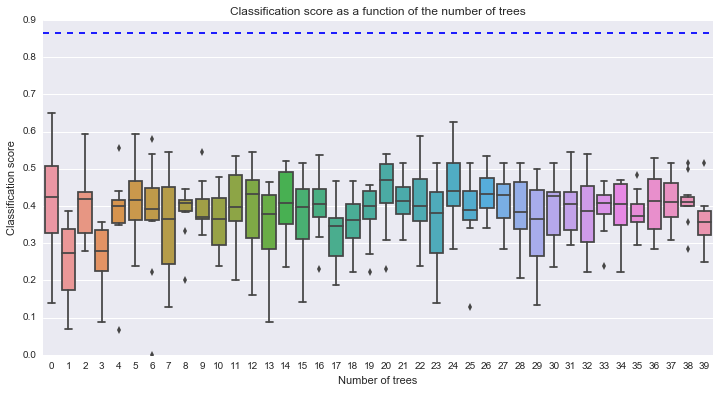

In [29]:
# your code here
blind_guess_score = sum(1-Y) / float(len(Y))
print(100*blind_guess_score)

plt.figure(figsize=(12,6))
sns.boxplot(data=scores)
plt.axhline(y=blind_guess_score, ls='--')
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees')
plt.show()

#### 问题2总结：
我们看到分数大约在40％左右。现在增加树的数量现在只有很少的收获。随机森林似乎很难优化f1得分。

## 问题3：分类器校准Classifier Calibration
许多分类器（包括随机森林分类器）可以返回**预测概率**，这可以被解释为给定预测点落入给定类的概率（即，给定数据X和候选类别c，预测概率表述为$P(Y = c | X)$)。然而，当训练数据中的类别**不平衡**时，如本葡萄酒示例中，由分类器计算的这些预测概率可能不准确。这是因为许多分类器，包括随机森林，没有办法内部调整这种不平衡。

尽管不平衡引起不准确性，如果我们可以选择一个正确的方法将预测概率转化为关于数据点所属的类的预测，则分类器返回的预测概率仍然可以用于构建良好的预测。我们称这个任务为**校准**。

如果分类器的预测概率是准确的，将其概率转换为预测值的适当方法是简单地选择概率> 0.5的类。当我们调用分类器的`predict`方法时，这是分类器的默认行为。当概率不准确时，这不行，但是我们仍然可以通过选择更合适的截止值来获得良好的预测。在这个问题中，我们将通过交叉验证来选择一个截止值。

**（a）**使用15棵树的随机森林分类器用于葡萄酒数据。计算分类器分配给每个训练样本的**预测概率**（提示：使用拟合后的分类器的`predict_proba`方法）。作为一个**健全测试sanity test**，构建一个基于这些预测概率的预测，用概率值标记所有葡萄酒，其预测概率在> 0.5的为类1，否则为类0。例如，如果最初概率$= [0.1,0.4,0.5,0.6,0.7]$，则预测应为$[0,0,0,1,1]$。将其与分类器的`predict`方法的输出进行比较，并显示它们是相同的。

In [30]:
# your code here
clf = RandomForestClassifier(n_estimators=15)
clf.fit(X, Y)

my_prediction = (clf.predict_proba(X)[:, 1] > 0.5).astype(int)
(my_prediction == clf.predict(X)).all()

True

**（b）**编写一个函数`cutoff_predict`，该函数采用训练过的分类器，数据矩阵X和截止值，并根据分类器的预测概率和截止值生成预测，如同前一个问题一样。

In [31]:
"""
cutoff_predict(clf, X, cutoff)

Inputs:
clf: a **trained** classifier object
X: a 2D numpy array of features
cutoff: a float giving the cutoff value used to convert
        predicted probabilities into a 0/1 prediction.

Output:
a numpy array of 0/1 predictions.
"""
## your code here
def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:, 1] > cutoff).astype(int)

**（c）** 使用10份的交叉验证，将从15个树的随机森林分类器的概率预测转换成预测值时，在`np.arange（0.1,0.9,0.1）`中找到一个截距值，该截距为最佳平均**F1分数**。 

为了帮助您完成此任务，我们为您提供了一个`custom_f1`函数，该函数需要一个截断值，并返回一个适用于作为`cross_val_score`的`score`参数。此函数使用您在上一个问题中定义的`cutoff_predict`函数。

使用`boxplot`，比较与每个候选截止值相对应的**F1分数**。

In [32]:
def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return sklearn.metrics.f1_score(y, ypred)
        
    return f1_cutoff

## your code here
scores =[]

for cutoff in np.arange(0.1, 0.9, 0.1):
    clf = RandomForestClassifier(n_estimators=15)
    score_list = cross_val_score(clf, X, Y, cv=10, scoring=custom_f1(cutoff))
    scores.append(score_list)

D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\skle

86.4290181363


D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


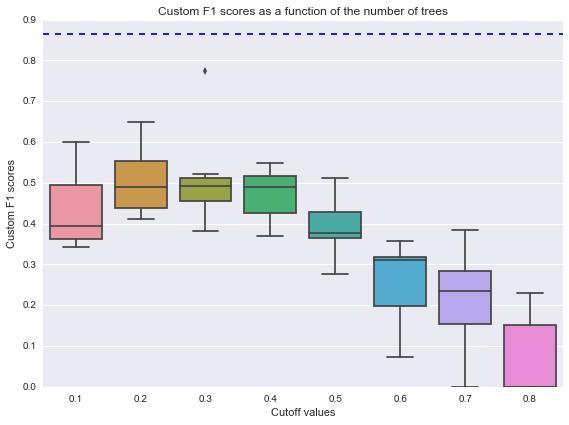

In [38]:
blind_guess_score = sum(1-Y) / float(len(Y))
print(100*blind_guess_score)

plt.figure(figsize=(8,6))
sns.boxplot(data=scores, names=np.arange(0.1,0.9,0.1))
plt.axhline(y=blind_guess_score, ls='--')
plt.xlabel('Cutoff values')
plt.xticks(range(8), np.arange(0.1,0.9,0.1))
plt.ylabel('Custom F1 scores')
plt.title('Custom F1 scores as a function of the number of trees')
plt.tight_layout()
plt.show()

**（d）**根据这一分析，哪个截止值给出最佳的预测结果？解释为什么根据训练数据中的**不平衡类**，这个答案是有意义的。

回答：0.2-0.3的截止值似乎能提供最佳的预测性能。直观的是，截止值小于0.5，因为训练数据包含很少的“好”葡萄酒的例子，所以我们需要调整分类器的截止值，以反映出这样一个事实，即一般来说，优质葡萄酒是罕见的。人们还可以将其描述为包含关于每个类出现频率的先验信息。

## 问题4：用决策边界可视化分类器
分类器的一个常见视觉总结是其决策表面。回想一下，训练过的分类器会接收特征X并尝试预测目标Y。，我们可以通过绘制分类器的**预测概率**（即，给定类别c，得到分配的概率Y = c）来可视化分类器是如何将不同的输入X转换成对类别Y的猜测。 scikit-learn中的大多数分类器都有一个名为`predict_proba`的方法，在分类器训练完成后，为新示例计算此值。

**（a）**如果将表面可视化绘制为一维或二维的输入X，则决策表面可视化真的只有意义。所以在绘制这些曲面之前，我们首先要找出X的**两个重要的维度**。回想一下，在之前的作业中，我们使用SVD执行类似的任务。在这里，不同于SVD，我们将使用基于随机森林的维度缩减方法。

随机森林允许我们计算一个启发式来确定特征在预测目标中的“重要性”。如果我们采用给定的特征并在训练集中的数据点上进行排列（加扰），则此启发式测量的预测精度发生变化。当特征的顺序被置换时，精度降低越多，我们可以得出结论这些被置换的特征越“重要”。重要性可以是选择少量可视化特征的有用方式。

正如你在之前问题中所做的那样，使用15棵树的随机森林对葡萄酒数据进行分类。使用分类器的`feature_importances_`属性来获取特征的相对重要性。这些特征对应数据的列。显示一个简单的**条形图**，显示了数据库中葡萄酒特征的相对重要性。

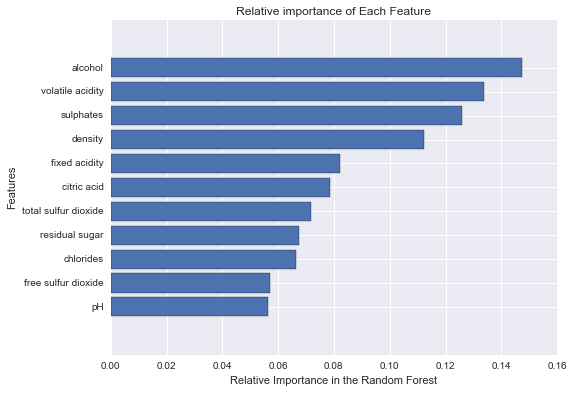

In [55]:
# your code here
clf = RandomForestClassifier(n_estimators=15)

clf.fit(X, Y)
importance_list = clf.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))

plt.figure(figsize=(8,6))
plt.barh(range(len(name_list)), importance_list, align='center')
plt.yticks(range(len(name_list)), name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

**（b）**下面，我们为您提供了一个函数`plot_decision_surface`，它绘制了一个分类器的决策表面，函数的参数是分类器对象，一个两列的特征矩阵和一个目标向量。 

使用此函数和上述“重要性”分析的结果，将数据矩阵的**子集**只包括最重要的两个特征。然后绘制决策树分类器的决策面，以及树数为15的随机森林分类器，将C设置为100的支持向量机，将伽马设置为1.0。

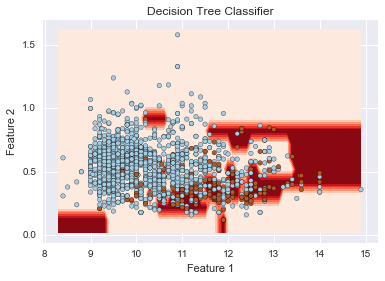

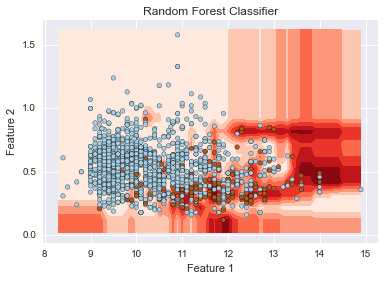

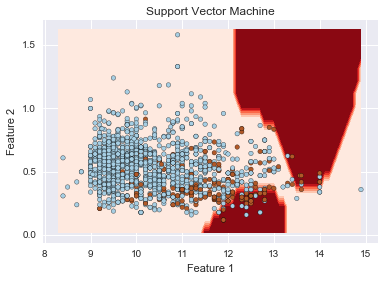

In [58]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y,cmap=plt.cm.Paired)
    plt.show()
    
## your code here
imp_cols = clf.feature_importances_.argsort()[::-1][0:2]
X_imp = X[:, imp_cols]

classifiers = [DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators=15),
              sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'Support Vector Machine']

for c in range(3):
    plt.title(titleClassifer[c])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plot_decision_surface(classifiers[c], X_imp, Y)

**(c)** 从讲座中回顾，分类器的偏差和方差之间存在权衡。我们想选择一个可以很好地泛化到未知数据的模型。使用高方差分类器，我们遇到过度适应噪声或无代表性训练数据的风险。相比之下，具有高偏差的分类器通常产生容易欠拟合的简单模型，不能捕获重要的规律性。 

在训练数据的复杂性和敏感度方面讨论上述决策平面的差异。这些属性如何与偏差和方差有关？

回答：决策树和随机森林的决策表面非常复杂（具有复杂形状的摆动轮廓）。决策树是迄今为止最敏感的，仅显示了受单个点影响的极端情况下的分类概率（见红色条纹，似乎只是为了包含观察到的“红色”点而出现）。随机森林显示较低的敏感度，孤立点具有远低于极端情况下的分类概率。 SVM是最不敏感的，因为它具有非常平滑的决策边界。 

分类器的高复杂性对应于较低的偏差，因为它可以对训练数据更“正确”，但是这也使分类器对训练数据中的随机变化更敏感，从而增加方差。

**（d）**sklearn的SVM实现具有可选参数`class_weight`。该参数默认设置为`None`，但也提供设置为`auto`模式，它使用标签Y的值与类频率成反比地**自动调整权重**。如在子问题4（b）中所做的，绘制两个SVM分类器的决策边界。对于这两个模型，使用`C = 1.0`和`gamma = 1.0`，而对于第一个SVM，设置`class_weigth`为`None`，第二个SVM将`class_weigth`设置为`auto`。 （提示：`None`是Python中的关键字，而'auto'是一个字符串，需要引号。）

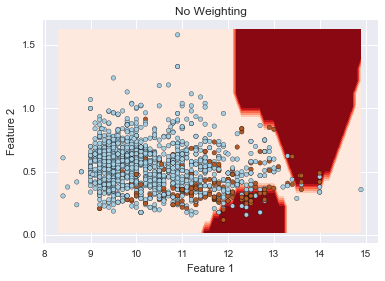

D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


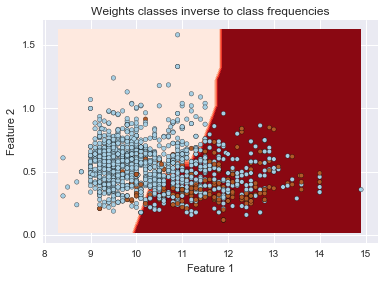

In [67]:
# your code here

classifiers = [
#               RandomForestClassifier(n_estimators=15),
              sklearn.svm.SVC(C=100.0, gamma=1.0, class_weight=None),
              sklearn.svm.SVC(C=1.0, gamma=1.0, class_weight='auto')]

titleClassifer = ['No Weighting', 'Weights classes inverse to class frequencies']

for c in range(2):
    plt.title(titleClassifer[c])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plot_decision_surface(classifiers[c], X_imp, Y)

**（e）**讨论精确度，召回率和整体性能方面的决策边界的差异。性能如何得以提高？

回答：具有相等类别权重的第一个SVM仅对正训练点的一小部分进行正确分类，但是对训练集仅产生很少的假阳性预测。因此，它具有更高的精度，但是具有比具有自动加权选项的第二个SVM有更低的召回率；第二个SVM具有高回叫率，但是精度很低。两个SVM的整体表现似乎相当差，两个模型都有很多错误分类的数据点。为了提高性能，我们必须实际调整参数（`C`，`kernel`，`kernel parameter`，`class_weight`）。